In [ ]:
!pip install seaborn datapackage

In [ ]:
import statsmodels.api as sm
import datapackage
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
data_url_example = 'https://datahub.io/core/natural-gas/datapackage.json'

# to load Data Package into storage
package = datapackage.Package(data_url_example)

# to load only tabular data
resources = package.resources
for resource in resources:
    if resource.tabular:
        data = pd.read_csv(resource.descriptor['path'])
        print (data)

            Date  Price
0     1997-01-07   3.82
1     1997-01-08   3.80
2     1997-01-09   3.61
3     1997-01-10   3.92
4     1997-01-13   4.00
...          ...    ...
5948  2020-08-26   2.52
5949  2020-08-27   2.52
5950  2020-08-28   2.46
5951  2020-08-31   2.30
5952  2020-09-01   2.22

[5953 rows x 2 columns]
       Month  Price
0    1997-01   3.45
1    1997-02   2.15
2    1997-03   1.89
3    1997-04   2.03
4    1997-05   2.25
..       ...    ...
279  2020-04   1.74
280  2020-05   1.75
281  2020-06   1.63
282  2020-07   1.77
283  2020-08   2.30

[284 rows x 2 columns]
Empty DataFrame
Columns: [[{"Date": "1997-01-07",  "Price": 3.82}, {"Date": "1997-01-08",  "Price": 3.8}, {"Date": "1997-01-09",  "Price": 3.61}, {"Date": "1997-01-10",  "Price": 3.92}, {"Date": "1997-01-13",  "Price": 4.0}, {"Date": "1997-01-14",  "Price": 4.01}, {"Date": "1997-01-15",  "Price": 4.34}, {"Date": "1997-01-16",  "Price": 4.71}, {"Date": "1997-01-17",  "Price": 3.91}, {"Date": "1997-01-20",  "Price": 3.26}

In [ ]:

data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)


2.183395823756456


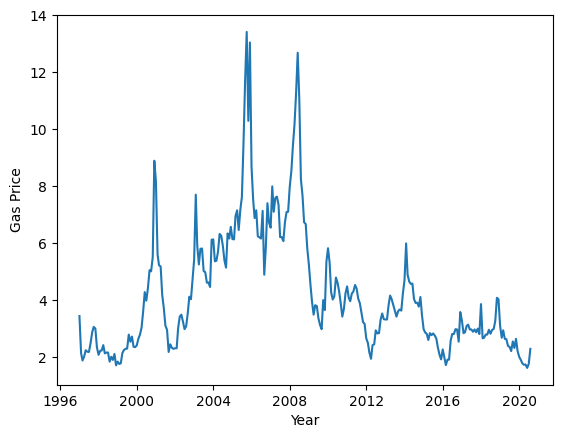

In [ ]:
plt.plot(data)
plt.xlabel('Year')
plt.ylabel('Gas Price')
plt.show()

In [ ]:
X = data['Price'].shift(1)
y = data['Price']

In [ ]:
train_size = int(len(data) * 0.8)
train_X, test_X = X[1:train_size], X[train_size:]
train_y, test_y = y[1:train_size], y[train_size:]

In [ ]:
model = sm.OLS(train_y, train_X)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              8978.
Date:                Mon, 05 Feb 2024   Prob (F-statistic):                   2.56e-183
Time:                        17:29:42   Log-Likelihood:                         -270.78
No. Observations:                 226   AIC:                                      543.6
Df Residuals:                     225   BIC:                                      547.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

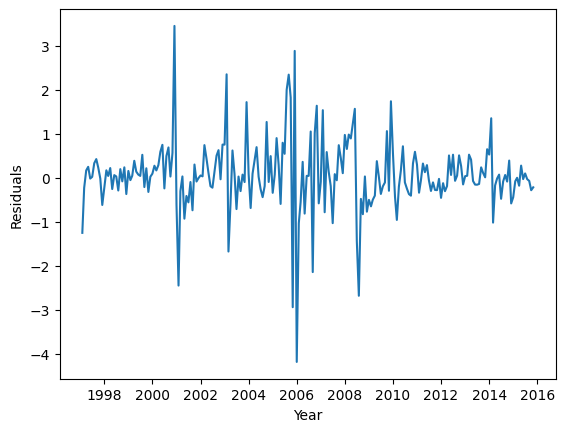

     lb_stat  lb_pvalue    bp_stat  bp_pvalue
12  22.65277   0.030823  21.711538   0.040883


In [ ]:
residuals = result.resid
plt.plot(residuals)
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.show()
print(sm.stats.diagnostic.acorr_ljungbox(residuals, lags=[12], boxpierce=True))